In [3]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

# import json
# s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


# IDEA:
## CitiBike users who are temporary pass holders (User Type = Customer) are more likely to use the service on weekends than users with annual memberships (User Type = Subscriber).

# NULL HYPOTHESIS:
## The ratio of weekend trips to weekday trips for users of type "Customer" is _the same_ or _lower_ than the same ratio for users of type "Subscriber."

# ALTERNATIVE HYPOTHESIS:
## The ratio of weekend trips to weekday trips for users of type "Customer" is _higher_ than the same ratio for users of type "Subscriber."

## _$H_0$_ : $\frac{C_{\mathrm{weekend}}}{C_{\mathrm{weekday}}} <= \frac{S_{\mathrm{weekend}}}{S_{\mathrm{weekday}}}$
## _$H_1$_ : $\frac{C_{\mathrm{weekend}}}{C_{\mathrm{weekday}}} > \frac{S_{\mathrm{weekend}}}{S_{\mathrm{weekday}}}$


## using a significance level of  $\alpha=0.05$

## Starting with June 2016 data only

### Download and move data to PUIDATA directory on compute:

In [4]:
# Define a simple function to retrieve data for a specific month and save it in PUIdata

def getCitiBikeCSV(datestring):
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):    
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

In [5]:
# Retrieve data for June 2016

datestring = '201606'
getCitiBikeCSV(datestring)

### Read csv into a Pandas dataframe:

In [6]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


### I will use the trip start time to determine whether the trip occured on a weekend or weekday.

In [7]:
# Create a new column in the df called 'data' with 'starttime' values converted to datetime type

df['date'] = pd.to_datetime(df.starttime)

In [8]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53


In [9]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

### Drop all columns except user type and date.

In [10]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [11]:
df.head()

,usertype,date
0,Subscriber,2016-06-01 00:00:18
1,Subscriber,2016-06-01 00:00:20
2,Subscriber,2016-06-01 00:00:21
3,Subscriber,2016-06-01 00:00:28
4,Subscriber,2016-06-01 00:00:53


## Absolute number of trips by user type plotted for each day of the week.

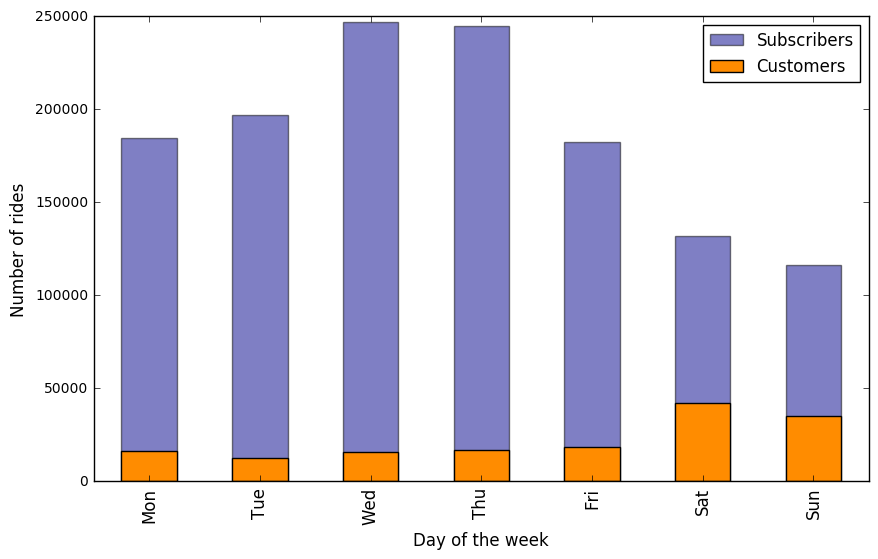

In [12]:
fig = pl.figure(figsize(10,6))

counts_c = df.date[df.usertype == 'Customer'].groupby([df.date.dt.weekday]).count()
counts_s = df.date[df.usertype == 'Subscriber'].groupby([df.date.dt.weekday]).count()

norm_s = 1
ax = ((df['date'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday]).count()) / norm_s).plot(
                                                                                        kind="bar", 
                                                                                        color='DarkBlue',
                                                                                        alpha=0.5)
norm_c = 1
((df['date'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday]).count()) / norm_c).plot(
                                                                                        kind="bar", 
                                                                                        color='DarkOrange')

tmp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=12)

ax.set_xlabel ("Day of the week", fontsize=12)
ax.set_ylabel ("Number of rides", fontsize=12)
pl.legend(['Subscribers','Customers'], fontsize=12)

## Include the errors

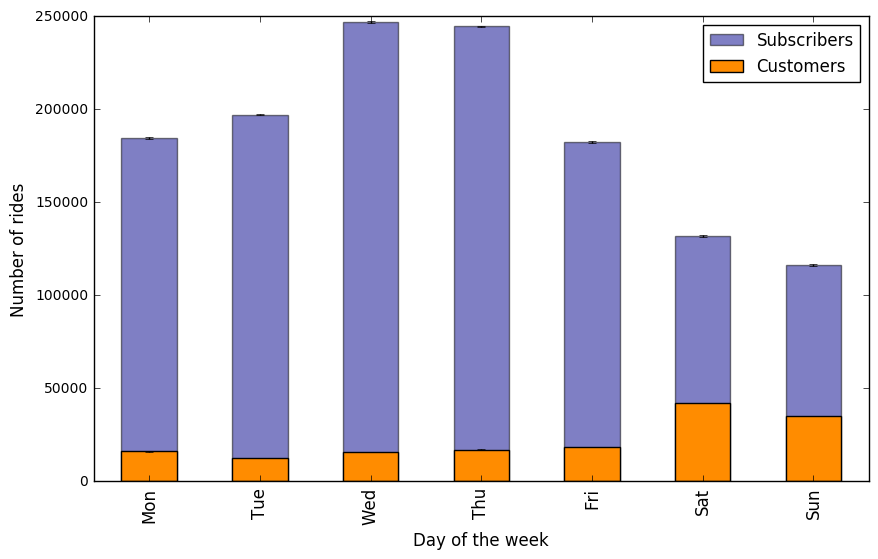

In [13]:
fig = pl.figure(figsize(10,6))

error_s = np.sqrt(counts_s)
ax=((counts_s) / norm_s).plot(kind="bar", color='DarkBlue', alpha=0.5, yerr=[
            ((error_s) / norm_s, (error_s) / norm_s)], label='Subscribers')

error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar", color='DarkOrange', yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='Customers')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=12)
ax.set_xlabel ("Day of the week", fontsize=12)
ax.set_ylabel ("Number of rides", fontsize=12)
pl.legend(['Subscribers','Customers',], fontsize=12)

### Figure 1: Distribution of CitiBike trips by user type, absolute counts.

## Normalized trips by user type plotted for each day of the week.

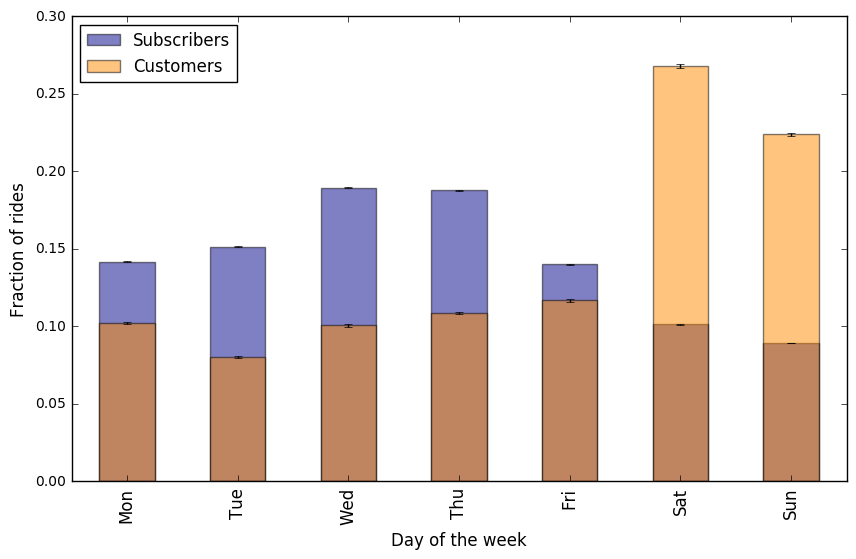

In [27]:
fig = pl.figure(figsize(10,6))

norm_s = counts_s.sum()
error_s = np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", color='DarkBlue', alpha=0.5, yerr=[
            ((error_s) / norm_s, (error_s) / norm_s)], label='Subscribers')

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
ax = ((counts_c) / norm_c).plot(kind="bar", color="DarkOrange", alpha=0.5, yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='Customers')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=12)
ax.set_ylabel ("Fraction of rides", fontsize=12)
ax.set_xlabel ("Day of the week", fontsize=12)
pl.legend(['Subscribers','Customers',], fontsize=12, loc='upper left')

### Figure 2: Distribution of CitiBike trips by user type, normalized.

## Set up the test of proportions

Customers: weekday: 0.508, weekend: 0.492, weekday error: 0.002, weekend error: 0.002
Subscribers: weekday: 0.810, weekend: 0.190, weekday error: 0.001, weekend error: 0.000


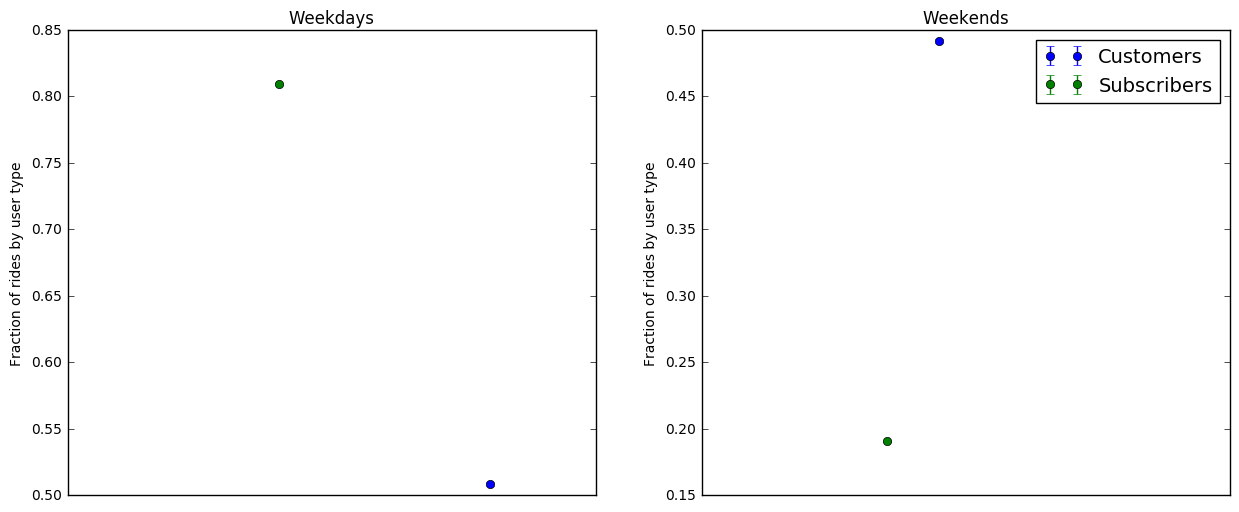

In [15]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
weekday_c = sum(counts_c[:-2]) * 1.0 / norm_c
weekend_c = sum(counts_c[-2:]) * 1.0 / norm_c
eweekday_c = np.sqrt(sum(error_c[:-2]**2)) / norm_c
eweekend_c = np.sqrt(sum(error_c[-2:]**2)) / norm_c

weekday_s = sum(counts_s[:-2]) * 1.0 / norm_s
weekend_s = sum(counts_s[-2:]) * 1.0 / norm_s
eweekday_s = np.sqrt(sum(error_s[:-2]**2)) / norm_s
eweekend_s = np.sqrt(sum(error_s[-2:]**2)) / norm_s

print("Customers: weekday: {0:.3f}, weekend: {1:.3f}, weekday error: {2:.3f}, weekend error: {3:.3f}"\
      .format(weekday_c, weekend_c, eweekday_c, eweekend_c))
print("Subscribers: weekday: {0:.3f}, weekend: {1:.3f}, weekday error: {2:.3f}, weekend error: {3:.3f}"\
      .format(weekday_s, weekend_s, eweekday_s, eweekend_s))

ax1.errorbar([0.4], [weekday_c], yerr=[eweekday_c], fmt='o', label='Customers')
ax1.errorbar([0.2], [weekday_s], yerr=[eweekday_s], fmt='o', label='Subscribers')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_c], yerr=[eweekend_c], fmt='o', label='Customers')
ax2.errorbar([0.2], [weekend_s], yerr=[eweekend_s], fmt='o', label='Subscribers')
ax1.set_xlim(0, 0.5)
ax1.set_title("Weekdays")
ax2.set_title("Weekends")
ax2.set_ylabel("Fraction of rides by user type")
ax1.set_ylabel("Fraction of rides by user type")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 14)

### Figure 3: Normalized proportion of rides by user type, weekdays and weekends. With the ratios being so distinct and the errors small, it is difficult to see the error bars in these plots.

In [16]:
print(weekend_c)
print(weekend_s)

0.491723627831
0.190325020752


In [17]:
print(norm_c)
print(norm_s)

156832
1303486


## Perform a z-test of proportions to evaluate the significance in the difference in proportion of trips on weekends across user types

In [23]:
# reassign variable names to fit formulae for sample proportion and stdev
P_0 = weekend_s
P_1 = weekend_c
n_0 = norm_s
n_1 = norm_c

#lets get the counts by multiplying by the sample size
# count_0 = P_0 * n_0
# count_1 = P_1 * n_1

# define the sample proportion
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.222693961178


In [25]:
# function to calculate standard deviation of the sample proportion
sp_stdev = lambda p, n: np.sqrt( p * ( 1 - p ) / n[0] +  p * ( 1 - p ) / n[1]  )

# standard deviation of the sample proportion
sp_stdev_wknd = sp_stdev(sp, [n_0, n_1])
print (sp_stdev_wknd)

0.00111199653585


In [26]:
# function to calculate z-score
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculate z-score
z_wknd = zscore(P_1, P_0, sp_stdev_wknd)
print (z_wknd)


271.042757204


### z-score = 271

### From the z table, a z-score of 271 would give us an extremely small p-value (much lower than the 0.05 significance level we have established). Therefore we reject the null hypothesis and assume that weekend ridership for "Customers" is significantly higher as a proportion of total rides in that category than the same proportion for "Subscribers."